IMPORTING LIBRARIES

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOADING THE DATASET

In [61]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [62]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


VISUALIZING THE DATA

Text(0, 0.5, 'Scores')

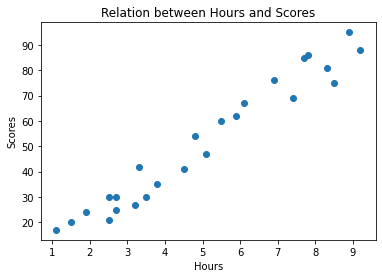

In [63]:
plt.scatter(x=df.Hours,y= df.Scores)
plt.title("Relation between Hours and Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

CHECKING THE CORRELATION

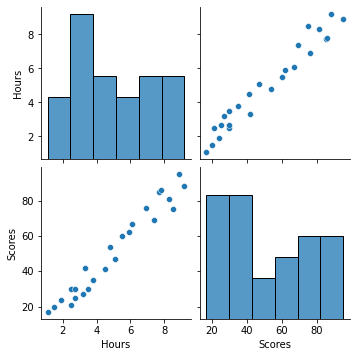

In [64]:
import seaborn as sns
sns.pairplot(df)

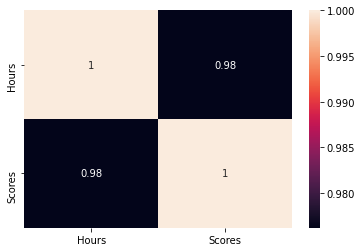

In [65]:
sns.heatmap(df.corr(),annot=True)

From the above figures, it is clear that the data is highly correlated and linearly dependent. Hence, a linear regression model can be applied.

PREPARING DATA

In [66]:
X= df['Hours'].values.reshape(-1,1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [67]:
X.shape

(25, 1)

In [68]:
Y=df['Scores'].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

SPLITTING DATA INTO TRAIN AND TEST SETS

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

TRAINING THE MODEL

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TRAINING COMPLETE


Plotting the regression line

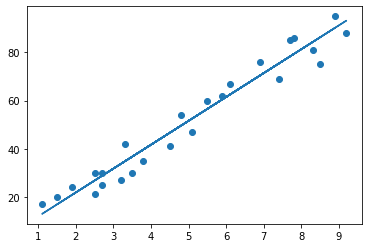

In [73]:
y=lin.coef_*X + lin.intercept_
plt.scatter(X,Y)
plt.plot(X,y)

PREDICTING WITH OUR OWN INPUT

In [74]:
lin.predict([[4]])

array([41.66078596])

Our model predicts that if we study for 4 hours,we can get a score of 41.94,according to the given dataset.

PREDICTING WITH TEST VALUES

In [75]:
y_pred=lin.predict(x_test)

In [76]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [77]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


MODEL EVALUATION

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.183859899002982

Our model gives us a mean absolute error 0f 4.18